In [1]:
import os
import numpy as np
from nanowire.optics.simulate import Simulator
from nanowire.optics.postprocess import Simulation
from nanowire.optics.utils.utils import setup_sim
from nanowire.optics.utils.config import Config
from nanowire.optics.utils.geometry import get_layers
import scipy.constants as consts
import scipy.integrate as intg
import IPython.display as disp
import matplotlib.pyplot as plt
import time
from itertools import product
plt.style.use(['presentation'])
%load_ext autoreload 
%autoreload 2
%load_ext ipycache

/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


In [2]:
def integrate(arr, xvals, yvals):
    x_integral = intg.trapz(arr, x=xvals, axis=0)
    y_integral = intg.trapz(x_integral, x=yvals, axis=0)
    return y_integral

In [3]:
ITO_locs = np.linspace(.501, .8, 4, endpoint=False)
NW_locs = np.linspace(.8, .8+1.3, 4, endpoint=False)
Sub_locs = np.linspace(.8+1.3, .8+1.3+1, 4, endpoint=False)
z_vals = np.concatenate((ITO_locs, NW_locs, Sub_locs))
num_points = np.arange(50, 550, 50)
numbasis = np.arange(200, 550, 50)
pairs = list(zip(num_points, num_points))
print(list(pairs))

[(50, 50), (100, 100), (150, 150), (200, 200), (250, 250), (300, 300), (350, 350), (400, 400), (450, 450), (500, 500)]


In [4]:
%%cache InPlaneResultsWeismann.pkl results times
results = np.zeros((len(numbasis), len(pairs), z_vals.shape[0]))
times = np.zeros_like(results)
conf = Config('InPlaneSampleTest.yml')
freq = conf[('Simulation', 'params', 'frequency')]
for k, basis in enumerate(numbasis):
    print('#'*25)
    print('Computing with {} basis terms'.format(basis))
    conf[('Simulation', 'params', 'numbasis')] = basis
    for i, (xpts, ypts) in enumerate(pairs):
        print('-'*25)
        print('Computing with {} points per edge'.format(xpts))
        conf[('Simulation', 'x_samples')] = xpts
        conf[('Simulation', 'y_samples')] = ypts
        sim = Simulator(conf)
        sim.setup()
        layers = get_layers(sim)
        for j, z in enumerate(z_vals):
            layer_obj = [layer for layer in layers.values() if layer.start <= z <= layer.end].pop()
            n_mat, k_mat = layer_obj.get_nk_matrix(freq)
            start = time.time()
            Ex, Ey, Ez, Hx, Hy, Hz = sim.compute_fields_on_plane(z, sim.xsamps, sim.ysamps)
            end = time.time()
            diff = end - start
            normEsq = np.absolute(Ex)**2 + np.absolute(Ey)**2 + np.absolute(Ez)**2
            res = integrate(n_mat*k_mat*normEsq, sim.X, sim.Y)
            results[k, i, j] = res
            times[k, i, j] = diff
print('Done!')

[Skipped the cell's code and loaded variables results, times from file '/home/kyle_robertson/software/nanowire/tests/notebooks/InPlaneResultsWeismann.pkl'.]
#########################
Computing with 200 basis terms
-------------------------
Computing with 50 points per edge
-------------------------
Computing with 100 points per edge
-------------------------
Computing with 150 points per edge
-------------------------
Computing with 200 points per edge
-------------------------
Computing with 250 points per edge
-------------------------
Computing with 300 points per edge
-------------------------
Computing with 350 points per edge
-------------------------
Computing with 400 points per edge
-------------------------
Computing with 450 points per edge
-------------------------
Computing with 500 points per edge
#########################
Computing with 250 basis terms
-------------------------
Computing with 50 points per edge
-------------------------
Computing with 100 points per edge

# Convergence w.r.t Sampling Points, Fixed Basis

## N = 200

/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


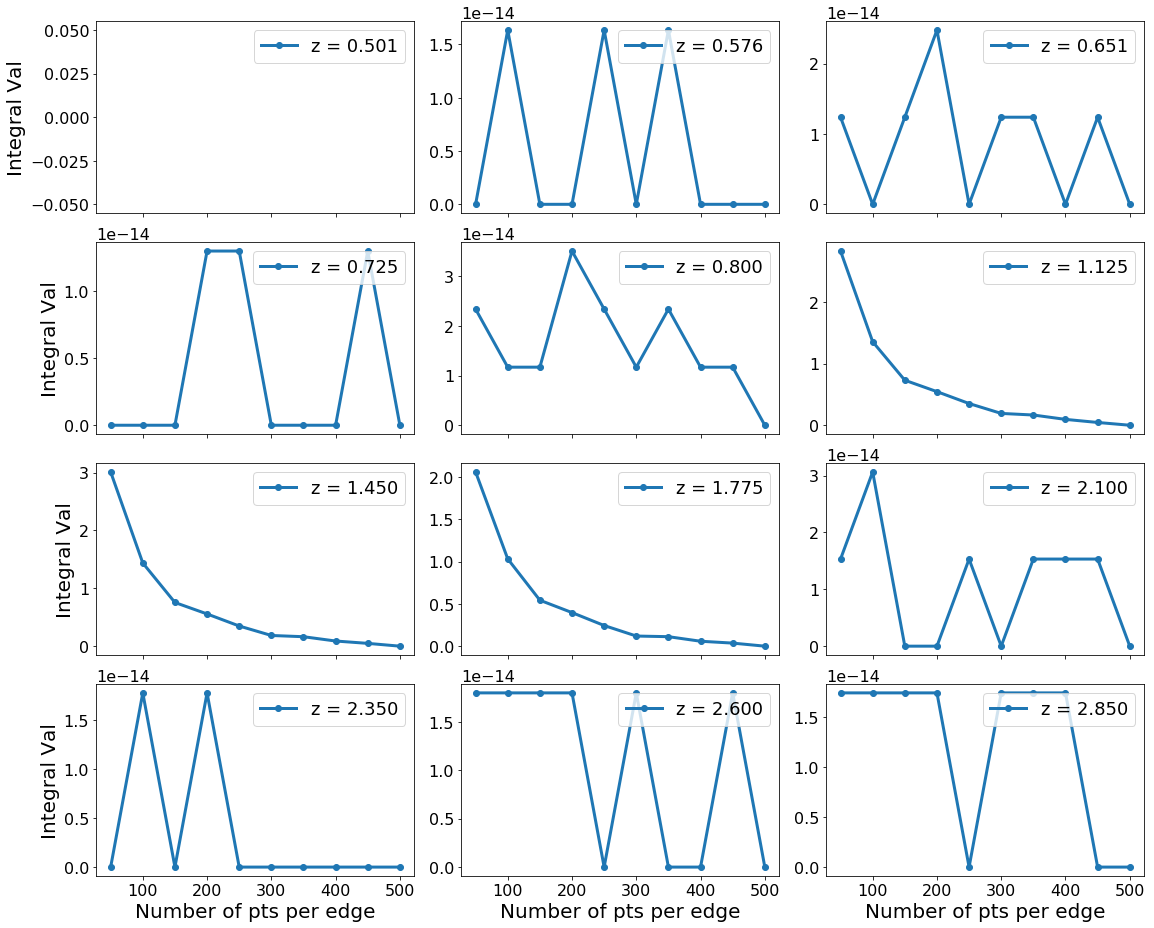

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(16, 13), sharex=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    rel_diff = np.array(
        [100*np.abs(results[-1,-1,i]-results[-1,j,i])/results[-1,-1,i] for j in range(len(results[-1, :, i]))])
    #axes[i].plot(total_pts, results[0, :, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].plot(total_pts, rel_diff, marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
    #pdiff = 100*abs(results[0, 0, i] - results[-1, -1, i])/results[0, -1, i]
    #print('Percent Diff = {}'.format(pdiff))
for ax in axes[-3:]:
    ax.set_xlabel("Number of pts per edge")
for ax in axes[0::3]:
    ax.set_ylabel("Integral Val")
plt.tight_layout()
plt.show()

## N = 500

/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


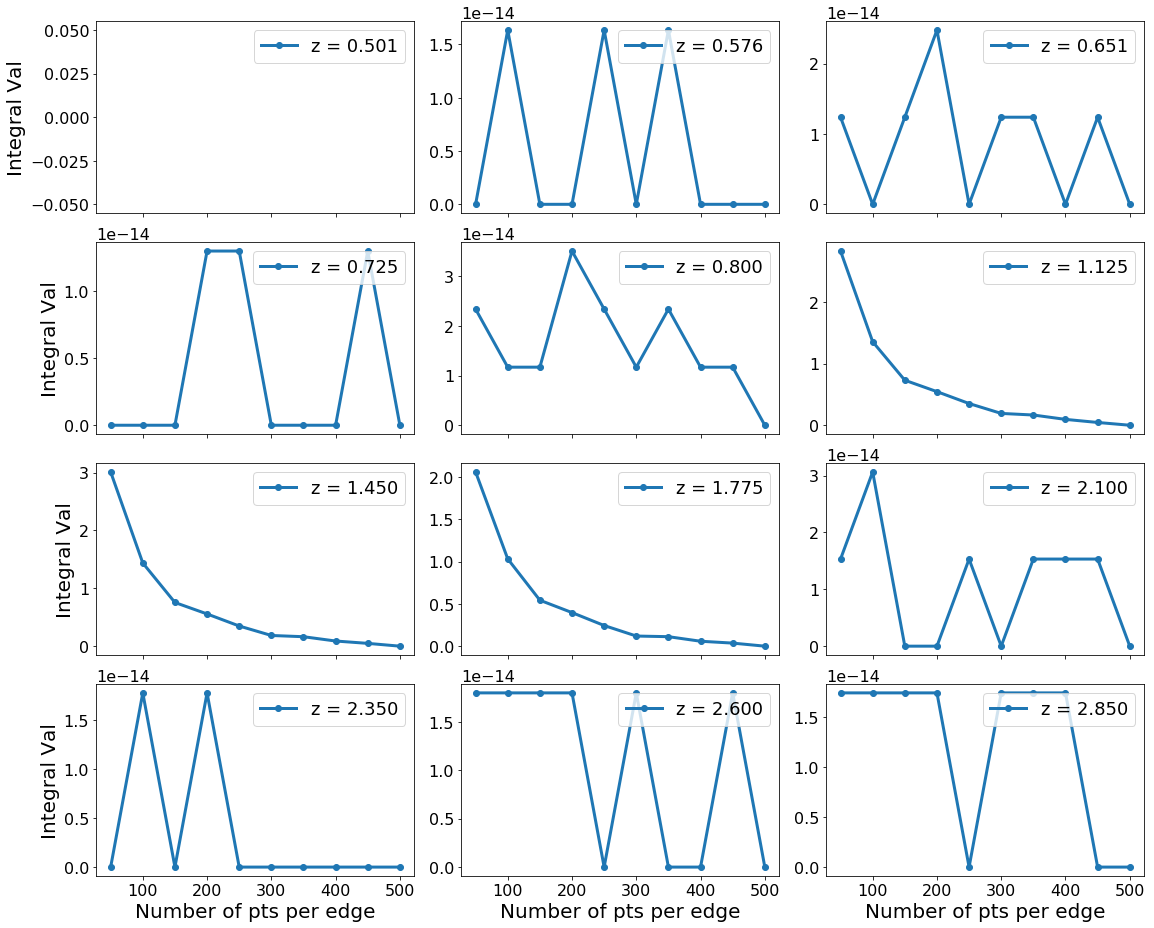

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(16, 13), sharex=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    rel_diff = np.array(
        [100*np.abs(results[-1,-1,i]-results[-1,j,i])/results[-1,-1,i] for j in range(len(results[-1, :, i]))])
    #axes[i].plot(total_pts, results[-1, :, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].plot(total_pts, rel_diff, marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
    #pdiff = 100*abs(results[-1, 1, i] - results[-1, -1, i])/results[-1, -1, i]
    #print('Percent Diff = {}'.format(pdiff))
for ax in axes[-3:]:
    ax.set_xlabel("Number of pts per edge")
for ax in axes[0::3]:
    ax.set_ylabel("Integral Val")
plt.tight_layout()
plt.show()

# Convergence w.r.t Number of Basis Terms, Converged Sampling

/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


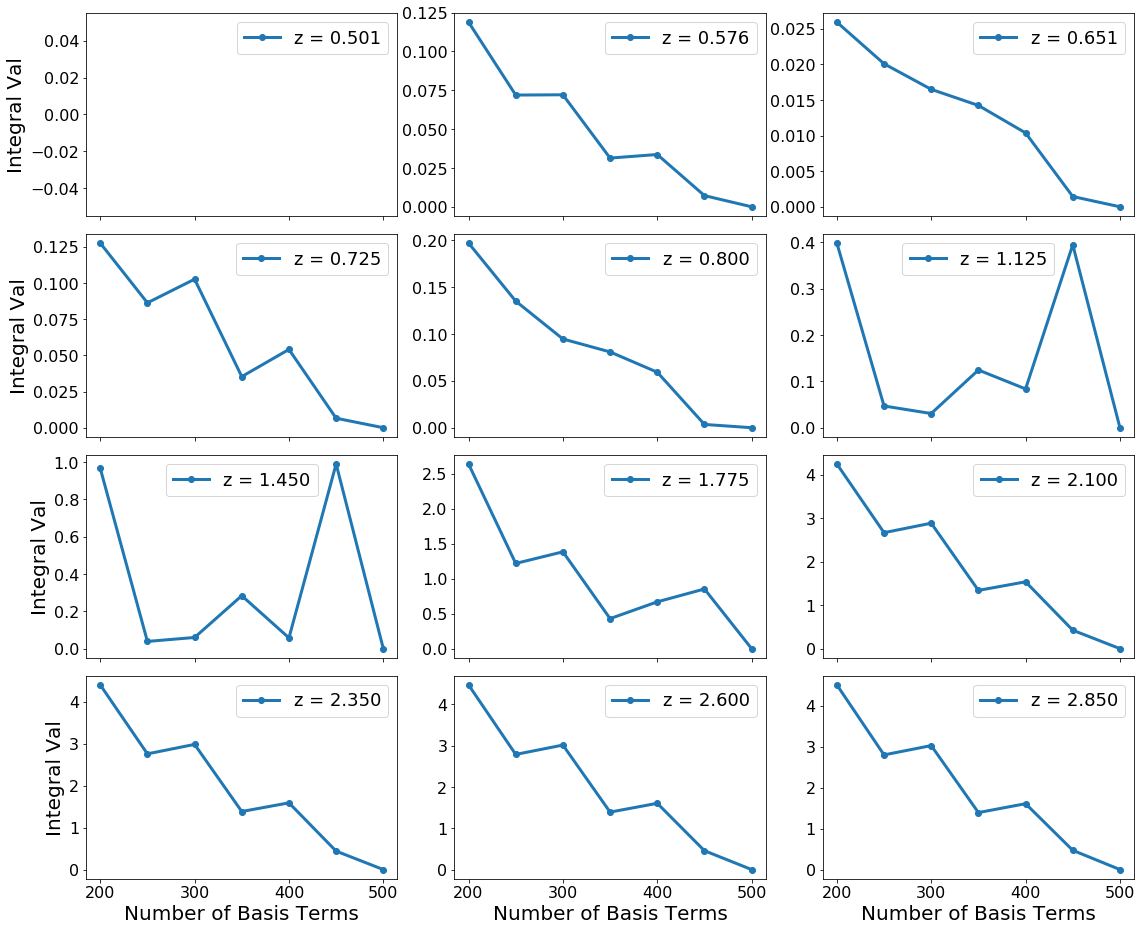

In [7]:
cols = 3
rows = int(np.ceil(len(z_vals))/3)
fig, axes = plt.subplots(rows, cols, figsize=(16, 13), sharex=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    rel_diff = np.array(
        [100*np.abs(results[-1,2,i]-results[j,2,i])/results[-1,2,i] for j in range(len(results[:, 2, i]))])
    #axes[i].plot(numbasis, results[:, -1, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].plot(numbasis, rel_diff, marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
    #pdiff = 100*abs(results[-2, -1, i] - results[-1, -1, i])/results[-1, -1, i]
    #print('Percent Diff = {} at z = {}'.format(pdiff, z))
for ax in axes[-3:]:
    ax.set_xlabel("Number of Basis Terms")
for ax in axes[0::3]:
    ax.set_ylabel("Integral Val")
plt.tight_layout()
plt.show()

# Convergence w.r.t Number of Basis Terms, Most Dense Sampling

/home/kyle_robertson/.virtualenvs/nanowire/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


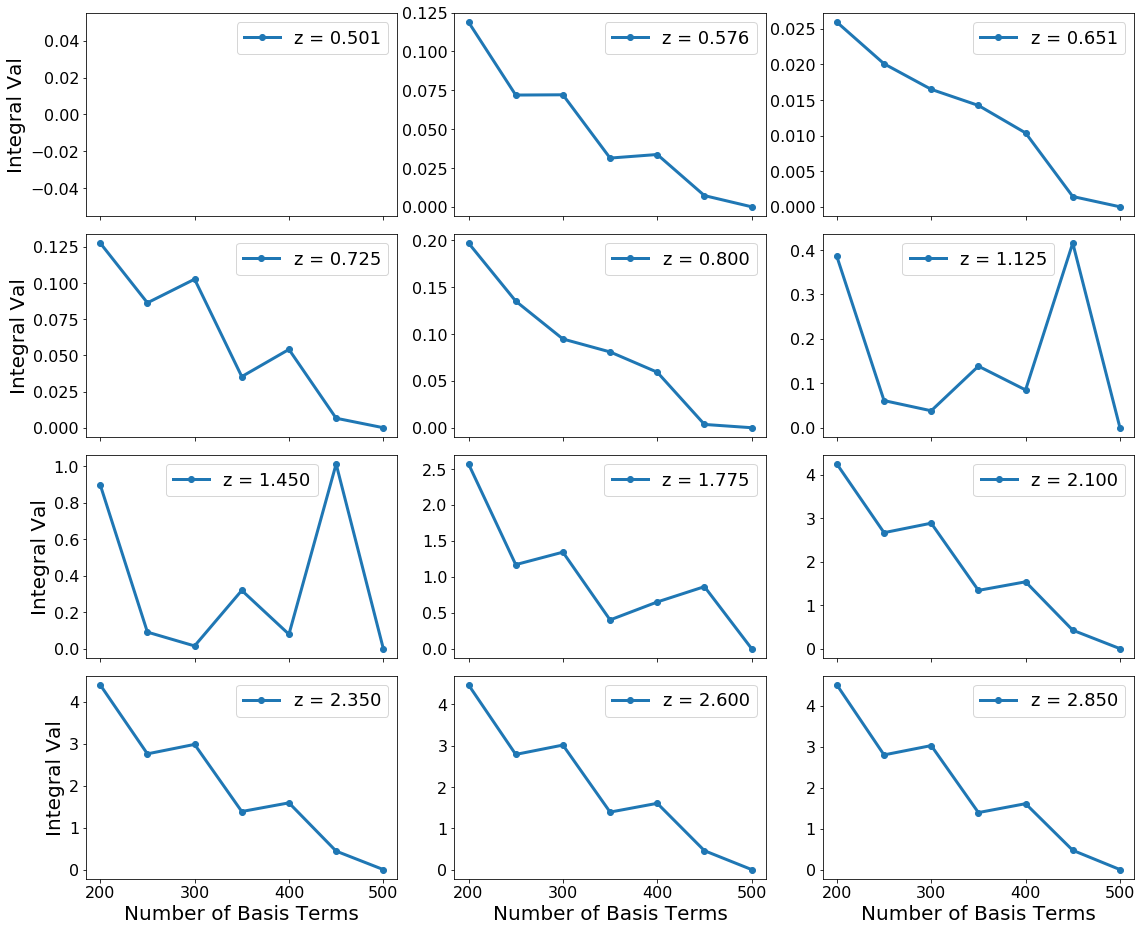

In [8]:
cols = 3
rows = int(np.ceil(len(z_vals))/3)
fig, axes = plt.subplots(rows, cols, figsize=(16, 13), sharex=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    rel_diff = np.array(
        [100*np.abs(results[-1,-1,i]-results[j,-1,i])/results[-1,-1,i] for j in range(len(results[:, -1, i]))])
    #axes[i].plot(numbasis, results[:, -1, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].plot(numbasis, rel_diff, marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
    #pdiff = 100*abs(results[-2, -1, i] - results[-1, -1, i])/results[-1, -1, i]
    #print('Percent Diff = {} at z = {}'.format(pdiff, z))
for ax in axes[-3:]:
    ax.set_xlabel("Number of Basis Terms")
for ax in axes[0::3]:
    ax.set_ylabel("Integral Val")
plt.tight_layout()
plt.show()

# Run Time w.r.t Number of Sampling Points, 500 Basis

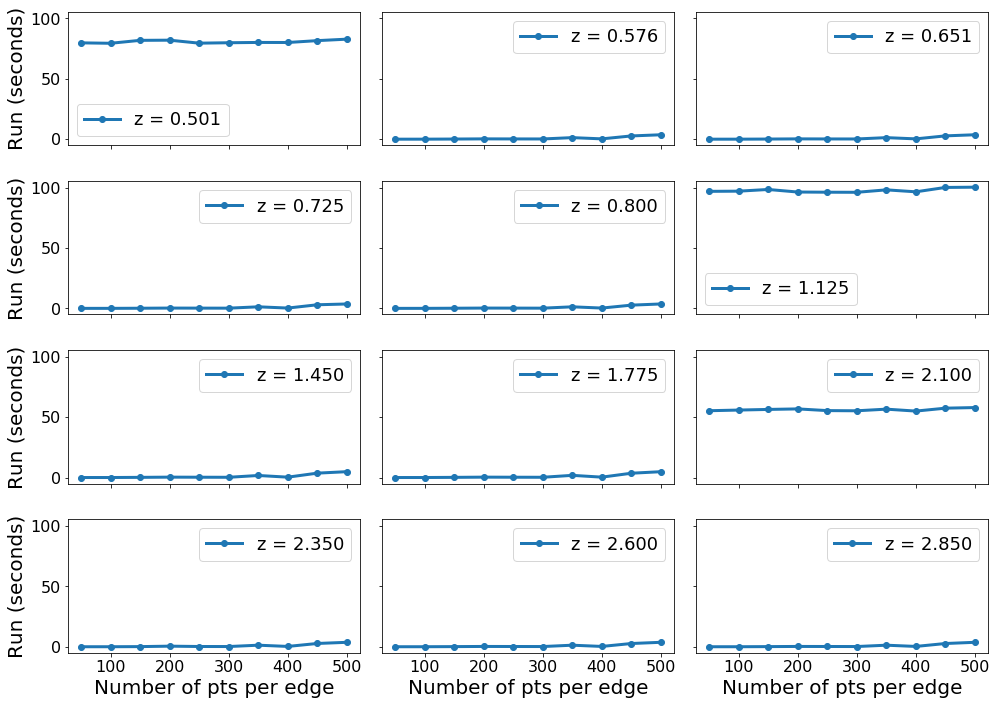

In [9]:
cols = 3
rows = int(np.ceil(len(z_vals)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    axes[i].plot(total_pts, times[-1, :, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Number of pts per edge")
for ax in axes[0::3]:
    ax.set_ylabel("Run (seconds)")
plt.tight_layout()
plt.show()

# Run Time w.r.t Z Location, Fixed Basis

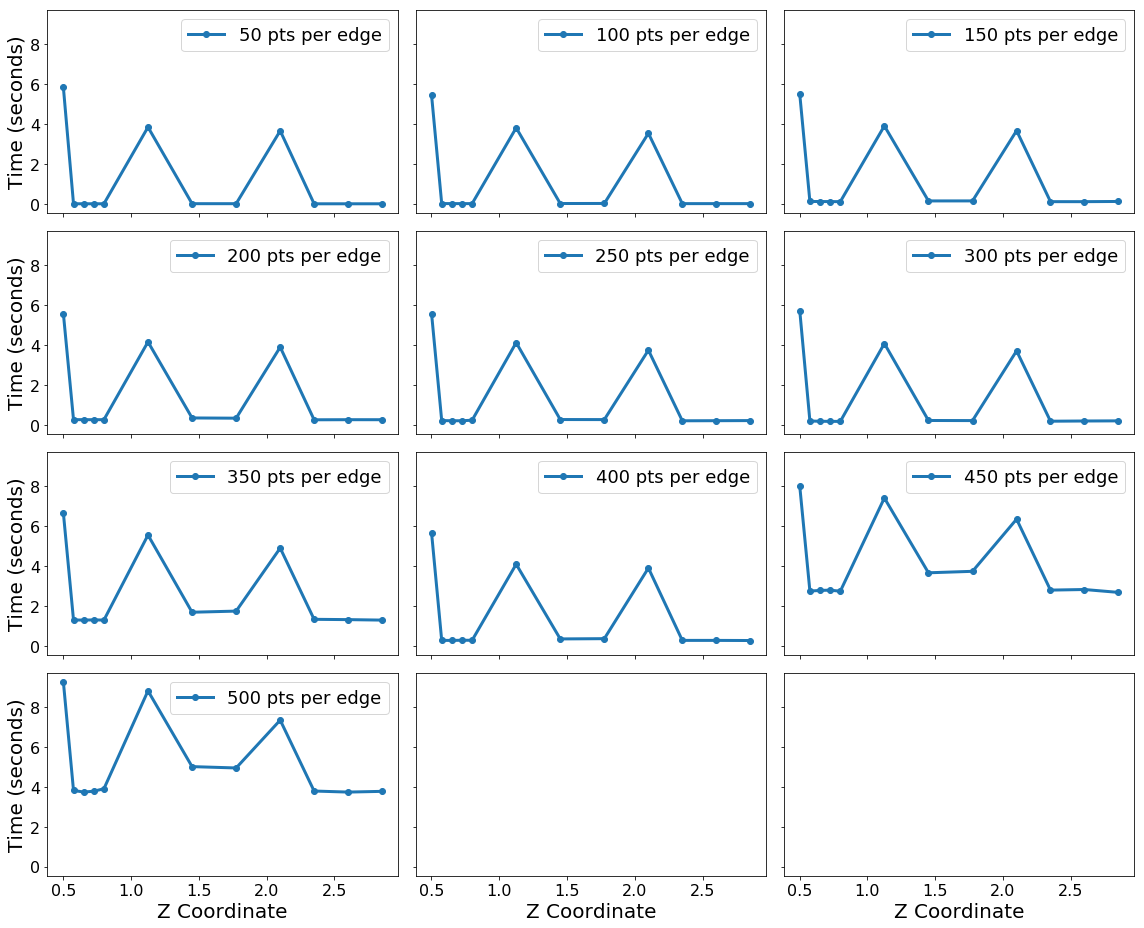

In [10]:
cols = 3
rows = int(np.ceil(len(pairs)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 13), sharex=True, sharey=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, (xpts, ypts) in enumerate(pairs):
    axes[i].plot(z_vals, times[0, i, :], marker='o', label="{} pts per edge".format(xpts))
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Z Coordinate")
for ax in axes[0::3]:
    ax.set_ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

# Run Time Scaling w.r.t Sampling Points, Fixed Basis

## N = 200

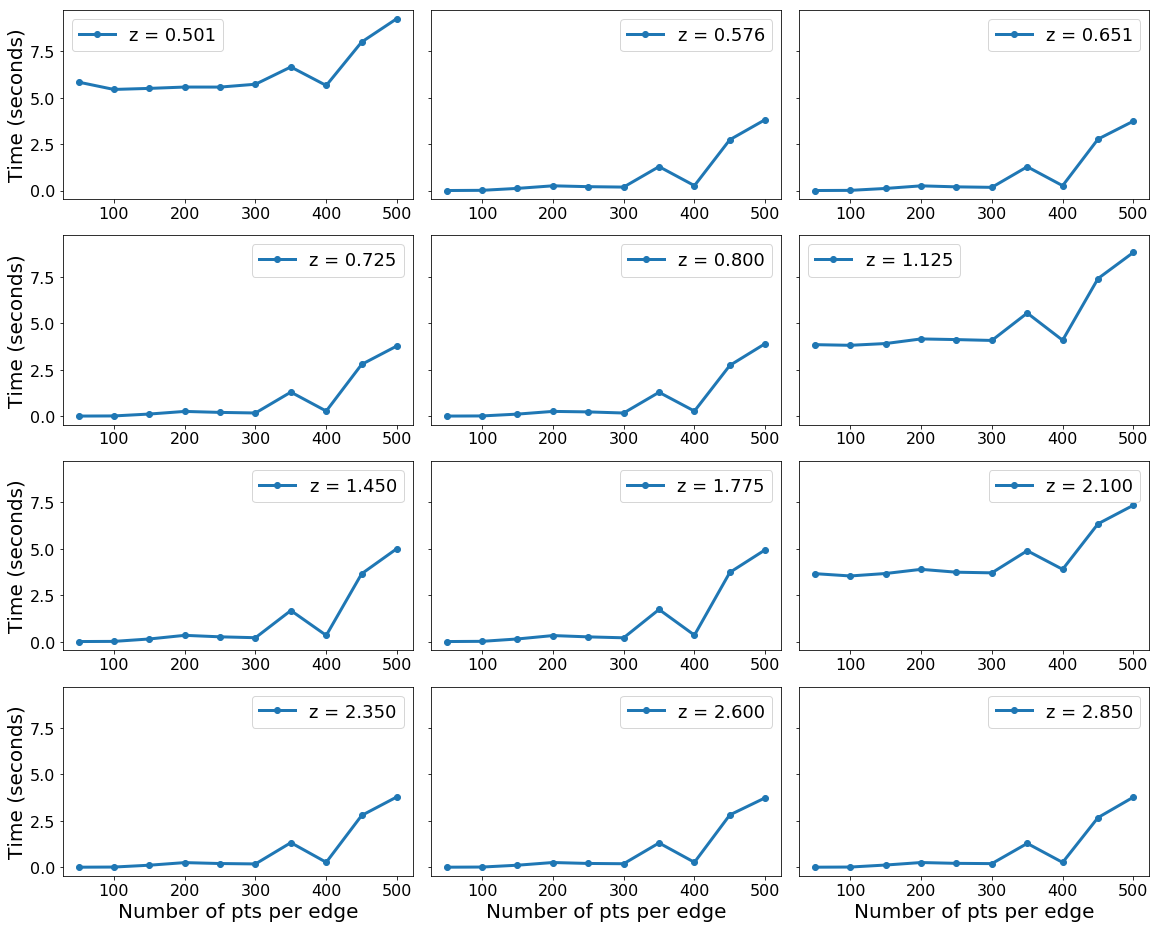

In [11]:
cols = 3
rows = int(np.ceil(len(z_vals)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 13), sharey=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    axes[i].plot(total_pts, times[0, :, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Number of pts per edge")
for ax in axes[0::3]:
    ax.set_ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

## N = 500

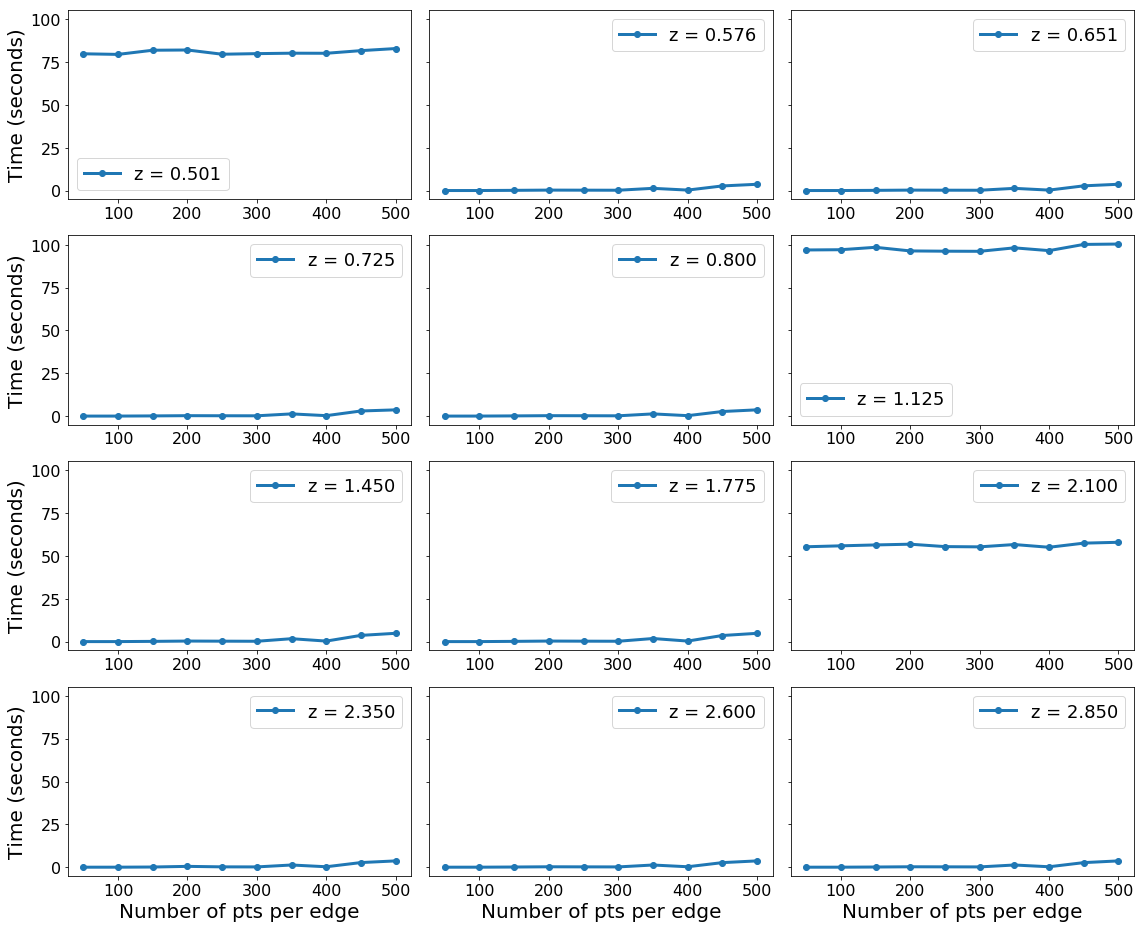

In [12]:
cols = 3
rows = int(np.ceil(len(z_vals)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 13), sharey=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, z in enumerate(z_vals):
    axes[i].plot(total_pts, times[-1, :, i], marker='o', label="z = {:.3f}".format(z))
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Number of pts per edge")
for ax in axes[0::3]:
    ax.set_ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

# Run Time Scaling w.r.t Sampling Points, z = 1.125

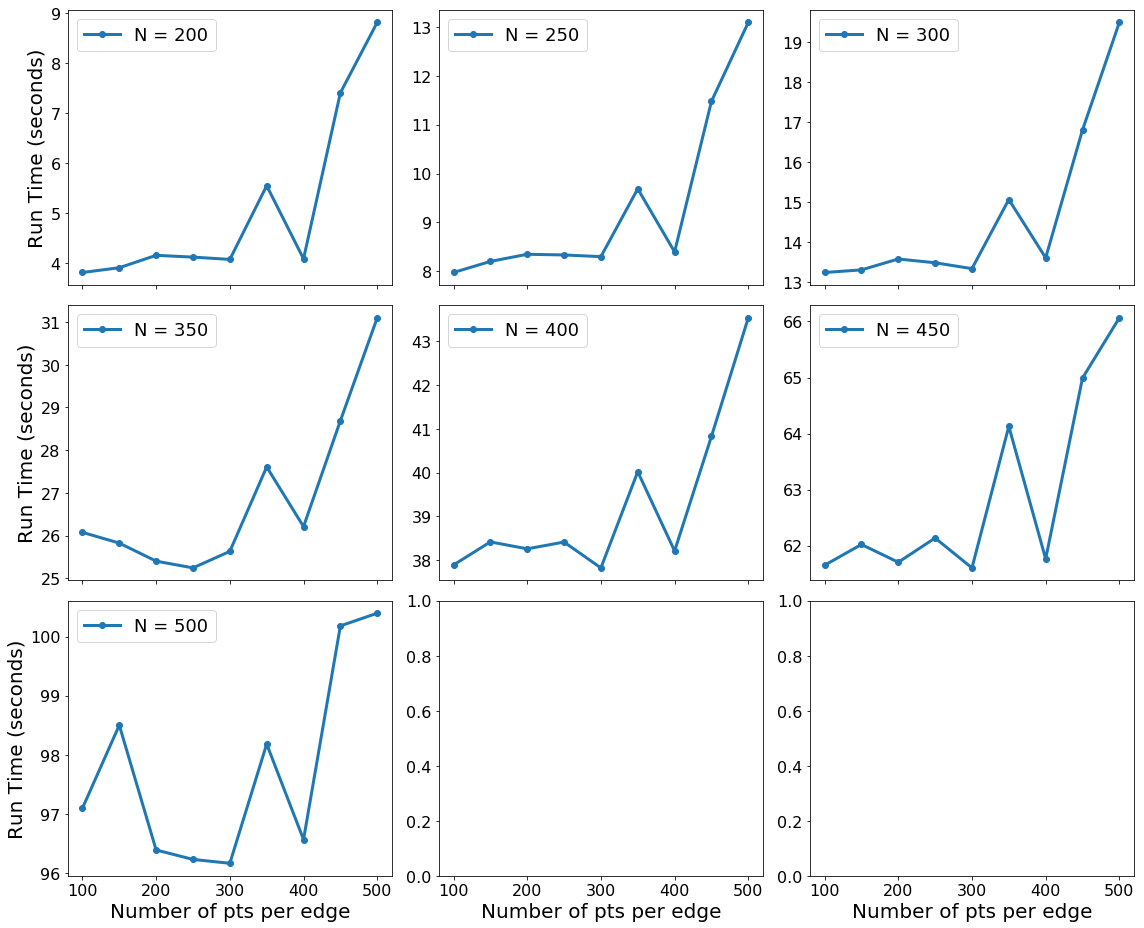

In [13]:
cols = 3
rows = int(np.ceil(len(numbasis)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 13), sharex=True)
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, basis in enumerate(numbasis):
    axes[i].plot(total_pts[1:], times[i, 1:, 5], marker='o', label="N = {}".format(basis))
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Number of pts per edge")
for ax in axes[0::3]:
    ax.set_ylabel("Run Time (seconds)")
plt.tight_layout()
plt.show()

# Run Time Scaling w.r.t Basis Terms, z=1.125

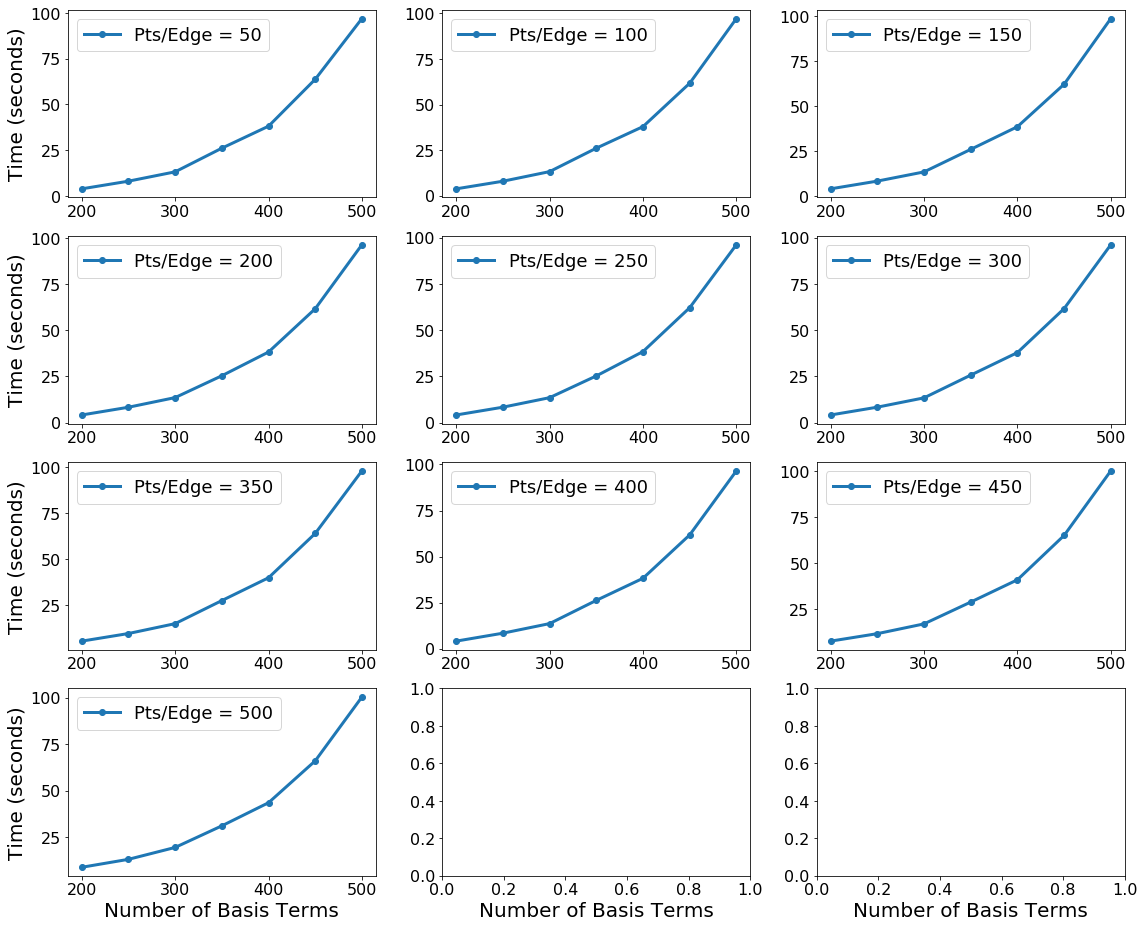

In [14]:
cols = 3
rows = int(np.ceil(len(pairs)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 13))
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
for i, pair in enumerate(pairs):
    axes[i].plot(numbasis, times[:, i, 5], marker='o', label="Pts/Edge = {}".format(pair[0]))
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Number of Basis Terms")
for ax in axes[0::3]:
    ax.set_ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

[  7.052e-10   4.123e+00   2.204e+00]
[[  7.833e-19  -1.780e-10  -1.028e-09]
 [ -1.780e-10   4.044e-02   2.318e-01]
 [ -1.028e-09   2.318e-01   1.987e+00]]
[  3.440e-10   4.237e+00   2.766e+00]
[[  2.504e-19  -1.167e-10  -6.328e-10]
 [ -1.167e-10   5.436e-02   2.928e-01]
 [ -6.328e-10   2.928e-01   2.403e+00]]
[  2.316e-10   4.302e+00   3.034e+00]
[[  9.724e-20  -6.730e-11  -3.586e-10]
 [ -6.730e-11   4.659e-02   2.464e-01]
 [ -3.586e-10   2.464e-01   2.009e+00]]
[  3.543e-10   4.231e+00   3.037e+00]
[[  1.426e-19  -6.453e-11  -3.480e-10]
 [ -6.453e-11   2.920e-02   1.563e-01]
 [ -3.480e-10   1.563e-01   1.274e+00]]
[  4.449e-10   4.194e+00   2.819e+00]
[[  1.675e-19  -6.033e-11  -3.315e-10]
 [ -6.033e-11   2.174e-02   1.186e-01]
 [ -3.315e-10   1.186e-01   9.788e-01]]
[  3.451e-10   4.235e+00   2.985e+00]
[[  1.820e-19  -8.451e-11  -4.541e-10]
 [ -8.451e-11   3.926e-02   2.094e-01]
 [ -4.541e-10   2.094e-01   1.702e+00]]
[  6.282e-10   4.140e+00   4.098e+00]
[[  5.270e-19  -1.344e-10 

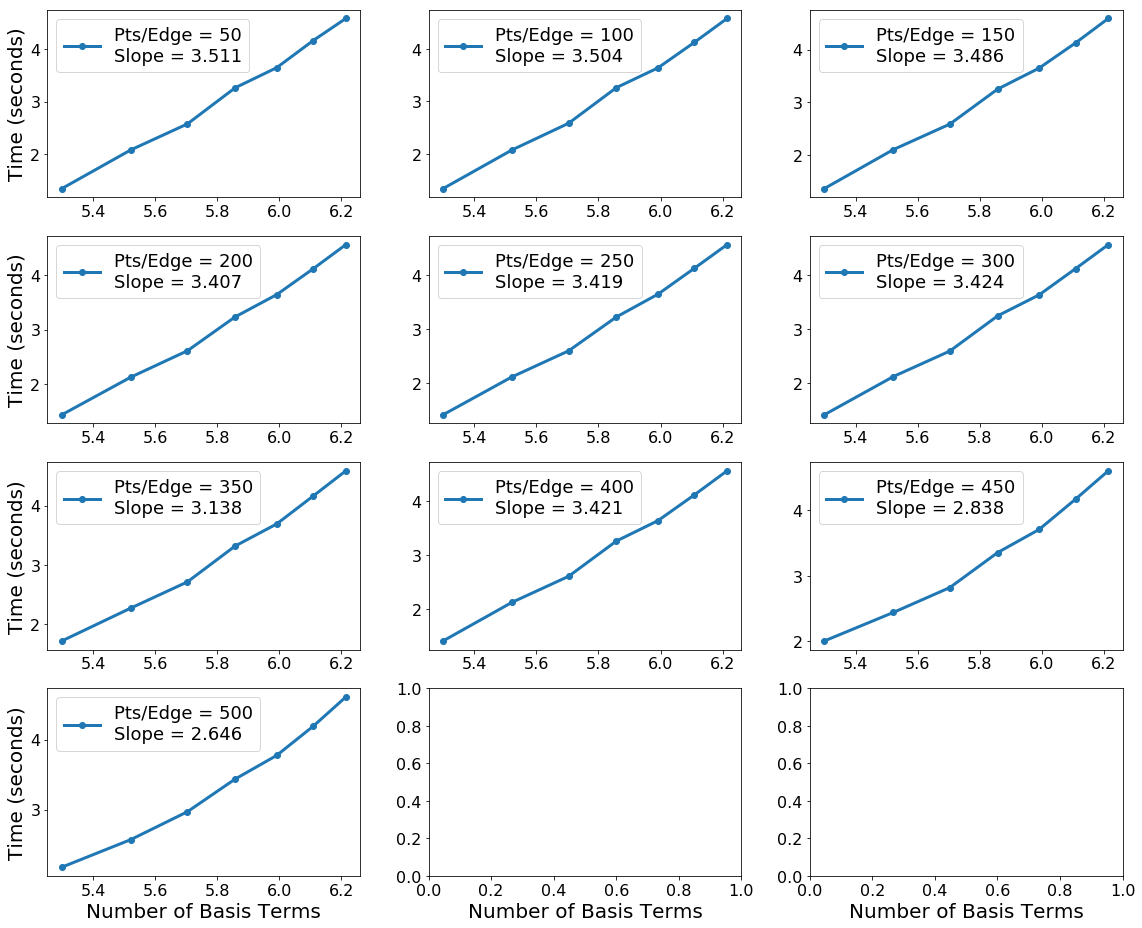

In [15]:
from scipy.optimize import curve_fit

def line(x, m, b):
    return m*x + b

def cube(x, a, m, b):
    return a*x**m + b

cols = 3
rows = int(np.ceil(len(pairs)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(16, 13))
axes = axes.flatten()
total_pts = np.array([tup[0] for tup in pairs])
x = np.log(numbasis)
for i, pair in enumerate(pairs):
    y = np.log(times[:, i, 5])
    opt_pars, par_cov = curve_fit(cube, numbasis, times[:, i, 5])
    print(opt_pars)
    print(par_cov)
    opt_pars, par_cov = curve_fit(line, x, y)
    slope = opt_pars[0]
    y_int = np.exp(opt_pars[1])
    lab = "Pts/Edge = {}\nSlope = {:.3f}".format(pair[0], slope)
    axes[i].plot(x, y, marker='o', label=lab)
    axes[i].legend(loc='best')
for ax in axes[-3:]:
    ax.set_xlabel("Number of Basis Terms")
for ax in axes[0::3]:
    ax.set_ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

In [16]:
xpts = 125
ypts = 125
conf[('Simulation', 'x_samples')] = xpts
conf[('Simulation', 'y_samples')] = ypts
sim = Simulator(conf)
sim.setup()
layers = get_layers(sim)
Ex, Ey, Ez, Hx, Hy, Hz = sim.compute_fields_on_plane(1.125, sim.xsamps, sim.ysamps)
normEsq = np.absolute(Ex)**2 + np.absolute(Ey)**2 + np.absolute(Ez)**2
print(normEsq.shape)

NameError: name 'conf' is not defined

In [ ]:
layers = get_layers(sim)
layer_obj = [layer for layer in layers.values() if layer.start <= z <= layer.end].pop()
n_mat, k_mat = layer_obj.get_nk_matrix(freq)
x = np.linspace(0, .25, 125)
nkE = n_mat*k_mat*normEsq
fig = plt.figure()
plt.plot(x, normEsq[62, :], label=r'$|E|^2$')
plt.plot(x, nkE[62, :], label=r'$nk|E|^2$')
plt.xlabel('Microns')
plt.ylabel('(V/m)^2')
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))
#ax1.plot(x, normEsq[250, :])
#ax1.set_title(r'$|E|^2$')
#ax2.plot(x, nkE[250, :])
#ax2.set_title(r'$nk|E|^2$')
plt.legend()
plt.show()